In [23]:
from gradient_descent import gradient_descent
from conjugate_gradients import conjugate_gradients_method
from one_dimensional import dichotomy_method, fibonacci_method, golden_ratio_method
import matplotlib.pyplot as plt
import numpy as np
import itertools
from math import *

In [3]:
f = lambda x: (x - 3) ** 2 + 8
f_grad = lambda x: 2 * (x - 3)
    
start_arg = 0
methods = [dichotomy_method, golden_ratio_method, fibonacci_method]

for method in methods:
    res = gradient_descent(f, f_grad, start_arg, method, pb=True, criterion=3, max_iterations=100000, step=None, eps=1e-6)
    print(f'method: {method.__name__}', f'result: {res[-1]}', f'iterations: {len(res)}')

  0%|          | 2/100000 [00:00<00:32, 3110.35it/s]

method: dichotomy_method result: 2.9999994677948676 iterations: 100001
method: golden_ratio_method result: 2.999999970197665 iterations: 4
method: fibonacci_method result: 2.9999999701976723 iterations: 4


In [4]:
f = lambda x: 3 * x**12 + (x - 12)**7 + (x - 37)**3 - (x + 32)**2 + 7
f_grad = lambda x: 36 * x**11 + 7 * (x - 12)**6 + 3 * (x - 37)**2 - 2 * (x + 32)
    
res = gradient_descent(f, f_grad, start_arg, pb=True method=None, criterion=1, max_iterations=100000, step=1e-9, eps=1e-5)
print(f'method: {method.__name__}', f'result: {res[-1]}', f'iterations: {len(res)}')

SyntaxError: invalid syntax (<ipython-input-4-5411a0f6355c>, line 4)

In [ ]:
f = lambda x: 3 * x**12 + (x - 12)**7 + (x - 37)**3 - (x + 32)**2 + 7
f_grad = lambda x: 36 * x**11 + 7 * (x - 12)**6 + 3 * (x - 37)**2 - 2 * (x + 32)
    
for method in methods:
    res = gradient_descent(f, f_grad, start_arg, method, pb=True, criterion=1, max_iterations=100000, step=None, eps=1e-5)
    print(f'method: {method.__name__}', f'result: {res[-1]}', f'iterations: {len(res)}')

In [7]:
def make_level_lines_plot(f, f_grad, start, method, x_min, x_max, y_min, y_max, levels, x_step=0.1, y_step=0.1):
    trace = gradient_descent(f, f_grad, start, method, pb=True)
    print(f'result: {trace[-1]}', f'iterations: {len(trace)}')
    if levels is None:
        levels = [f(args) for args in trace]
        list.sort(levels)
        
    x_s = np.arange(x_min, x_max, x_step)
    y_s = np.arange(y_min, y_max, y_step)
    z_s = np.array([[f(np.array([x, y])) for x in x_s] for y in y_s])

    plt.figure()
    cs = plt.contour(x_s, y_s, z_s, levels=levels)
    plt.clabel(cs)
    
    colors = itertools.cycle(["r", "g", "b"])
    plt.scatter([trace[0][0]], [trace[0][1]], color=next(colors))
    for i in range(len(trace) - 1):
        cur_point = trace[i]
        next_point = trace[i + 1]
        plt.scatter([next_point[0]], [next_point[1]], color=next(colors))
        plt.plot([cur_point[0], next_point[0]], [cur_point[1], next_point[1]], color="cyan")
    last_point = trace[-1]
    plt.scatter([last_point[0]], [last_point[1]], color="cyan")
    plt.grid()
    plt.show()

In [8]:
sum_squares_f = lambda args: np.sum(args ** 2)
sum_squares_grad = lambda args: 2 * args

  0%|          | 2/10000 [00:00<00:32, 305.67it/s]


result: [8.40182819e-15 8.40182819e-15] iterations: 4


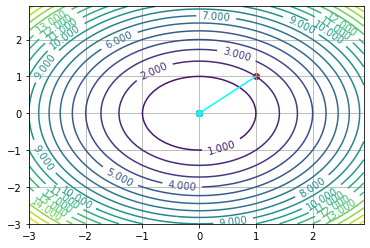

In [9]:
make_level_lines_plot(sum_squares_f,
              sum_squares_grad,
              start=np.array([1, 1]),
              method=golden_ratio_method,
              x_min=-3,
              x_max=3,
              y_min=-3,
              y_max=3,
              levels = 20
             )

In [10]:
def some_f(arg):
    x = arg[0]
    y = arg[1]
    return (x - 2) ** 2 + (y - 1) ** 2

def some_f_grad(arg):
    x = arg[0]
    y = arg[1]
    dx = 2 * (x - 2)
    dy = 2 * (y - 1)
    return np.array([dx, dy])

  0%|          | 2/10000 [00:00<00:11, 833.94it/s]


result: [2. 1.] iterations: 4


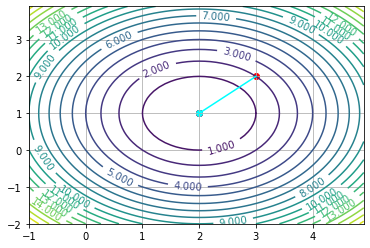

In [11]:
make_level_lines_plot(some_f,
              some_f_grad,
              start=np.array([3, 2]),
              method=golden_ratio_method,
              x_min=-1,
              x_max=5,
              y_min=-2,
              y_max=4,
              levels=20
             )

  1%|          | 91/10000 [00:00<00:02, 3908.63it/s]


result: [1.00013652 1.00013979] iterations: 93


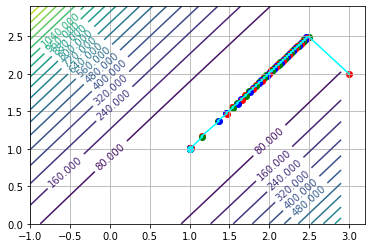

In [12]:
def first_function(args):
    x = args[0]
    y = args[1]
    return 100 * (y - x) ** 2 + (1 - x) ** 2

def first_function_grad(args):
    x = args[0]
    y = args[1]
    return np.array([-200 * (y - x) + 2 * x - 2, 200 * (y - x)])

make_level_lines_plot(first_function,
              first_function_grad,
              start=np.array([3, 2]),
              method=golden_ratio_method,
              x_min=-1,
              x_max=3,
              y_min=0,
              y_max=3,
              levels=20
             )

  2%|▏         | 164/10000 [00:00<00:02, 3423.51it/s]


result: [0.99972111 0.99944081] iterations: 166


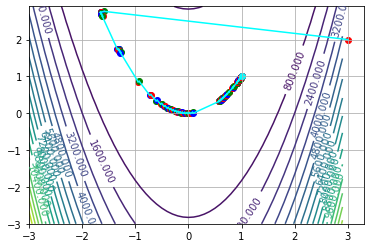

In [13]:
def second_function(args):
    x = args[0]
    y = args[1]
    return 100 * (y - x ** 2) ** 2 + (1 - x) ** 2

def second_function_grad(args):
    x = args[0]
    y = args[1]
    return np.array([-400 * (y - x ** 2) * x - 2 * (1 - x), 200 * (y - x ** 2)])

make_level_lines_plot(second_function,
              second_function_grad,
              start=np.array([3, 2]),
              method=golden_ratio_method,
              x_min=-3,
              x_max=3,
              y_min=-3,
              y_max=3,
              levels=20
             )

  0%|          | 7/10000 [00:00<00:11, 873.03it/s]


result: [1.9671507  2.88611501] iterations: 9


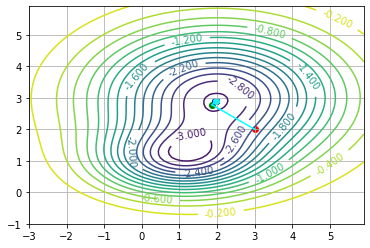

In [20]:
def third_function(args):
    x = args[0]
    y = args[1]
    return (-1) * (2 * exp(-((x - 1) / 2) ** 2 - (y - 1) ** 2) + 3 * exp(-((x - 2) / 3) ** 2 - ((y - 3) / 2) ** 2))

    
def third_function_grad(args):
    x = args[0]
    y = args[1]
    return (-1.0) * np.array([2 * exp(-((x - 1) / 2) ** 2 - (y - 1) ** 2) * (-(x - 1) / 2) +
            3 * exp(-((x - 2) / 3) ** 2 - ((y - 3) / 2) ** 2) * (2.0 / 3.0) * (-(x - 2) / 3),
            2 * exp(-((x - 1) / 2) ** 2 - (y - 1) ** 2) * (-2 * (y - 1)) +
            3 * exp(-((x - 2) / 3) ** 2 - ((y - 3) / 2) ** 2) * (-((y - 3) / 2))])

make_level_lines_plot(third_function,
              third_function_grad,
              start=np.array([3, 2]),
              method=golden_ratio_method,
              x_min=-3,
              x_max=6,
              y_min=-1,
              y_max=6,
              levels=20
             )